<a href="https://colab.research.google.com/github/HarshKumarChoudary/AC-Data-Analysis/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3**

Given to Relate this AC_Data for ACs of a hotel in Gurgaon with the data of temperature of Gurgaon at that months.

First Importing and Cleaning our dataset to work on with. Also changing the timeline from Minutes to Days and Convertin all power values to averages.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/content/AC_Data.csv",parse_dates=['0'])

for col in df.columns:
  df[col] = df[col].interpolate(method='linear',limit_direction='forward')
print(df)

df_in_days = df.resample('1D',on = '0').mean().reset_index()
print(df_in_days)

                        0      AC 1      AC 2  ...     AC 16     AC 17     AC 18
0     2019-08-01 00:00:00  7.518632  8.788315  ...  4.113460  3.305072  6.735981
1     2019-08-01 00:01:00  7.472373  8.864465  ...  4.049972  3.262830  6.557740
2     2019-08-01 00:02:00  7.426114  8.940615  ...  3.986483  3.220588  6.379500
3     2019-08-01 00:03:00  7.239550  9.050859  ...  3.892182  3.176074  6.371487
4     2019-08-01 00:04:00  7.052986  9.161103  ...  3.797881  3.131560  6.363475
...                   ...       ...       ...  ...       ...       ...       ...
87835 2019-09-30 23:55:00  0.000000  6.122385  ...  1.854352  3.027539  7.259989
87836 2019-09-30 23:56:00  0.604588  6.137458  ...  1.862619  3.009743  7.197318
87837 2019-09-30 23:57:00  1.209176  6.152532  ...  1.870886  2.991946  7.134647
87838 2019-09-30 23:58:00  1.319809  6.115407  ...  1.866526  3.000690  7.157183
87839 2019-09-30 23:59:00  1.430442  6.078281  ...  1.862166  3.009434  7.179719

[87840 rows x 19 columns]
 


To get the data related to temperature near GurGaon for months of August and September of 2019 we are going to use the site https://www.ncei.noaa.gov/maps/daily-summaries/

This site provides with all the data for each day of these two Months in a pdf format (uploaded on Github).

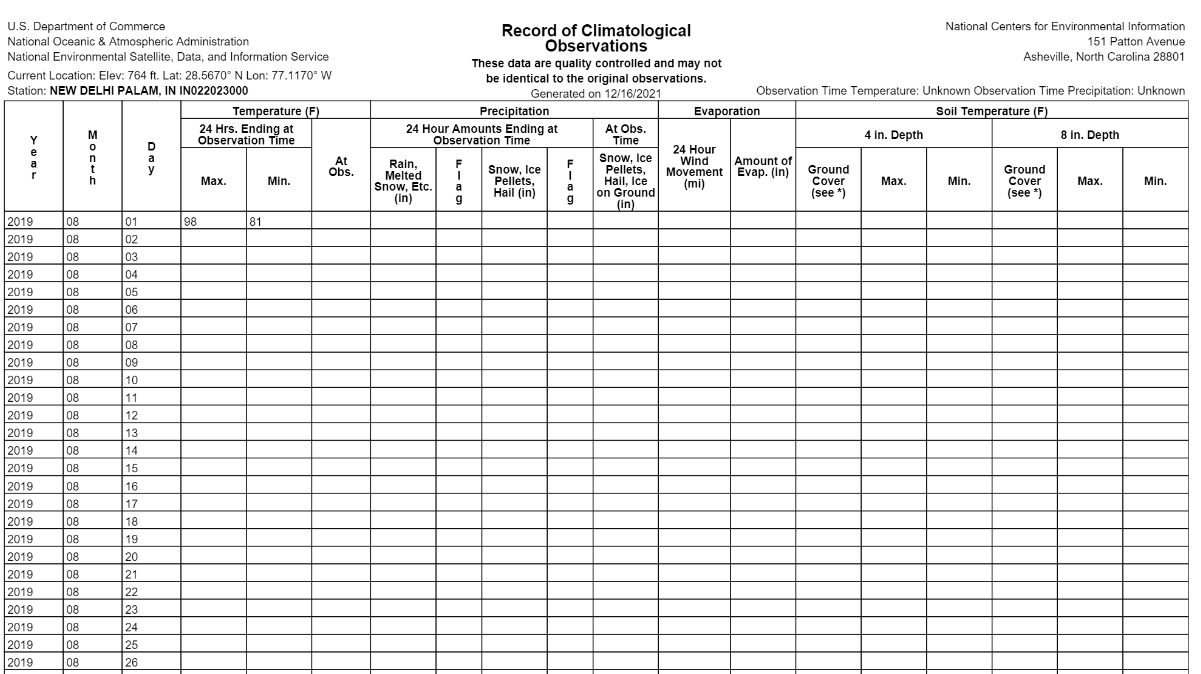


By Looking at the PDFs (at github) its clear that the Average Temperature for the given months is :
*   For August 2019 -  89.5 deg F.
*   For September 2019 - 89 deg F (31.6666 deg C).

So lets plot a graph showing the average power consumption of all the 18 ACs per day for each month.


**August- Average Power Consumption of each AC if outside temperature is 89.5 F.**

Taking mean of all the columns data upto august month only (30 Days)

In [5]:
data_for_august = df_in_days.iloc[1:30,:].mean(axis= 0)
data_for_august

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


AC 1     2.338852
AC 2     3.963575
AC 3     2.543735
AC 4     2.384654
AC 5     1.321419
AC 6     2.262073
AC 7     3.078012
AC 8     2.407454
AC 9     3.158631
AC 10    1.605435
AC 11    2.230964
AC 12    2.609270
AC 13    4.267496
AC 14    2.739760
AC 15    4.279652
AC 16    3.029587
AC 17    4.064755
AC 18    6.505315
dtype: float64

In [8]:
AugustData = pd.DataFrame(data_for_august)
AugustData['avg values'] = AugustData.values
print("The below given is the average power consumption of ACs in the month of August.")
AugustData.index.name = 'id'
AugustData

The below given is the average power consumption of ACs in the month of August.


,0,avg values
id,,
AC 1,2.338852,2.338852
AC 2,3.963575,3.963575
AC 3,2.543735,2.543735
AC 4,2.384654,2.384654
AC 5,1.321419,1.321419
AC 6,2.262073,2.262073
AC 7,3.078012,3.078012
AC 8,2.407454,2.407454
AC 9,3.158631,3.158631


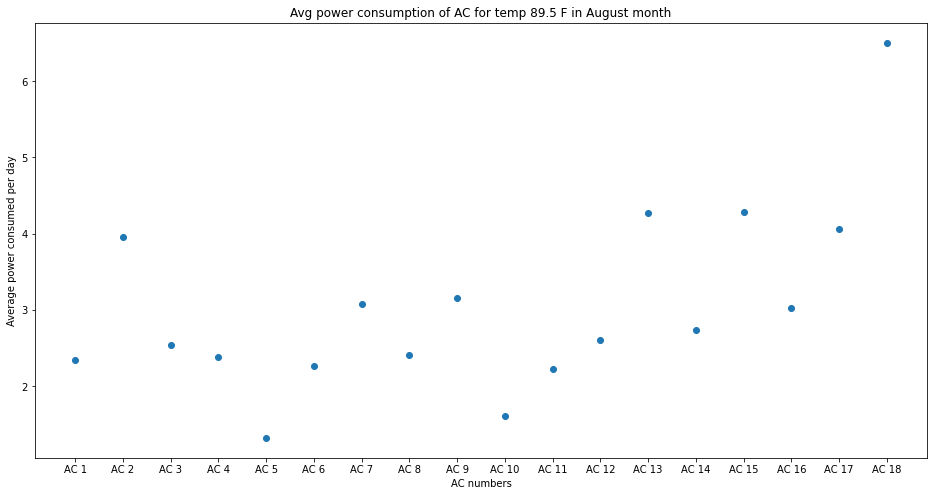

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(AugustData.index, AugustData['avg values'])
ax.set_xlabel('AC numbers')
ax.set_ylabel('Average power consumed per day')
plt.title('Avg power consumption of AC for temp 89.5 F in August month')
plt.show()

**September- Average Power Consumption of each AC if outside temperature is 89 F.**

Taking mean of all the columns data upto august month only (30 Days)

In [13]:
data_for_sept = df_in_days.iloc[31:,:].mean(axis= 0)
data_for_sept

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



AC 1     2.319665
AC 2     3.590472
AC 3     2.646647
AC 4     2.346576
AC 5     1.494452
AC 6     2.744284
AC 7     2.869206
AC 8     2.641587
AC 9     3.232679
AC 10    1.457257
AC 11    2.568311
AC 12    2.755873
AC 13    4.277216
AC 14    3.085315
AC 15    3.793228
AC 16    2.546800
AC 17    4.338954
AC 18    6.390544
dtype: float64

In [15]:
SeptData = pd.DataFrame(data_for_sept)
SeptData['avg values'] = SeptData.values
print("The below given is the average power consumption of ACs in the month of September.")
SeptData.index.name = 'id'
SeptData

The below given is the average power consumption of ACs in the month of September.


,0,avg values
id,,
AC 1,2.319665,2.319665
AC 2,3.590472,3.590472
AC 3,2.646647,2.646647
AC 4,2.346576,2.346576
AC 5,1.494452,1.494452
AC 6,2.744284,2.744284
AC 7,2.869206,2.869206
AC 8,2.641587,2.641587
AC 9,3.232679,3.232679


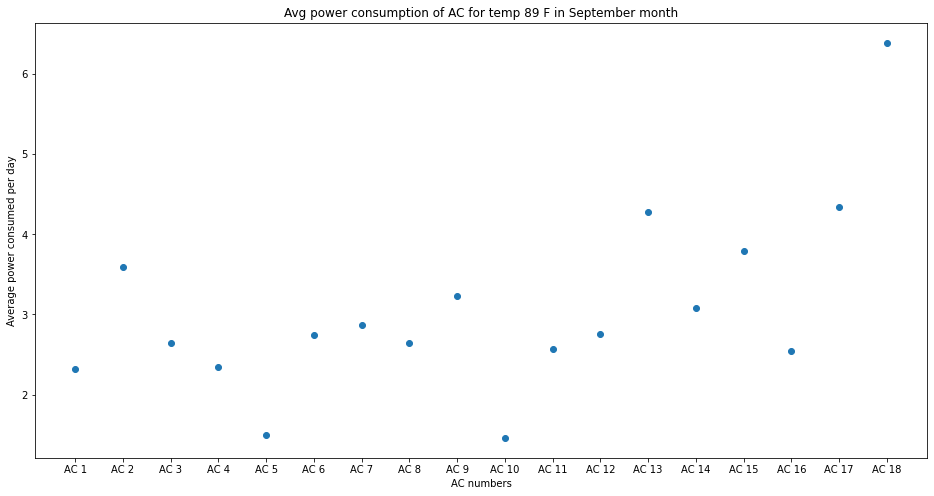

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(SeptData.index, SeptData['avg values'])
ax.set_xlabel('AC numbers')
ax.set_ylabel('Average power consumed per day')
plt.title('Avg power consumption of AC for temp 89 F in September month')
plt.show()